<a href="https://colab.research.google.com/github/siddhantjain07/Tensorflow-in-Practice/blob/master/2.TF-CNNs/TF_CNNs3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using pre-trained models

In [2]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2020-09-17 14:05:33--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  50.4MB/s    in 1.7s    

2020-09-17 14:05:35 (50.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


In [4]:
import tensorflow as tf

In [6]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
# Add a fully connected layer with 1,024 hidden units and ReLU activation
# Add a dropout rate of 0.2               
# Add a final sigmoid layer for classification


x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation=tf.nn.relu)(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation=tf.nn.sigmoid)(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer = RMSprop(lr = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [7]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats')                       # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')                       # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')             # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')             # Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

--2020-09-17 14:19:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  61.4MB/s    in 1.1s    

2020-09-17 14:19:21 (61.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 18s - loss: 0.3459 - accuracy: 0.8595 - val_loss: 0.0993 - val_accuracy: 0.9630
Epoch 2/20
100/100 - 17s - loss: 0.2142 - accuracy: 0.9205 - val_loss: 0.1528 - val_accuracy: 0.9470
Epoch 3/20
100/100 - 17s - loss: 0.2070 - accuracy: 0.9235 - val_loss: 0.2410 - val_accuracy: 0.9250
Epoch 4/20
100/100 - 17s - loss: 0.1994 - accuracy: 0.9265 - val_loss: 0.1352 - val_accuracy: 0.9550
Epoch 5/20
100/100 - 17s - loss: 0.1892 - accuracy: 0.9365 - val_loss: 0.1191 - val_accuracy: 0.9630
Epoch 6/20
100/100 - 17s - loss: 0.1668 - accuracy: 0.9385 - val_loss: 0.1142 - val_accuracy: 0.9650
Epoch 7/20
100/100 - 17s - loss: 0.1545 - accuracy: 0.9390 - val_loss: 0.0981 - val_accuracy: 0.9670
Epoch 8/20
100/100 - 17s - loss: 0.1593 - accuracy: 0.9525 - val_loss: 0.1247 - val_accuracy: 0.9680
Epoch 9/20
100/100 - 17s - loss: 0.1562 - accuracy: 0.9415 - val_loss: 0.1148 - val_accuracy: 0.9670
Epoch 10/20
100/100 - 17s - loss: 0.1610 - accuracy: 0.9405 - val_loss: 0.1149 - val_accura

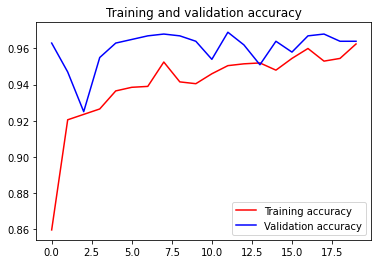

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()